In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
from math import sqrt

In [2]:
rcParams['figure.figsize'] = 12, 8

In [3]:
M = 100
s = 5
g = np.random.normal(size = M)

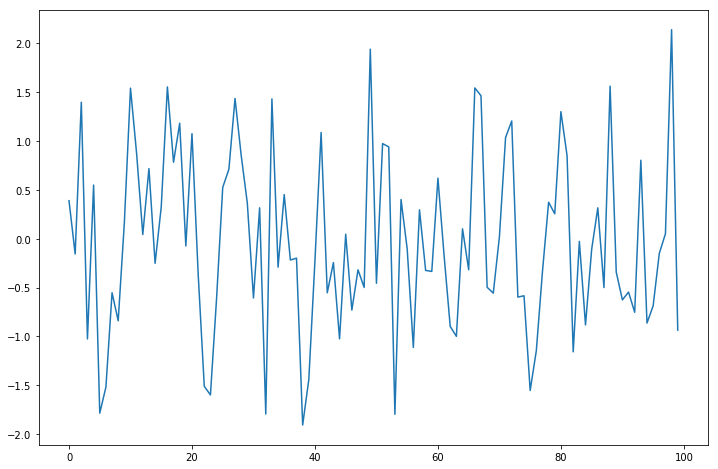

In [4]:
plt.plot(g)
plt.show()

In [5]:
b0 = [i for i in range(7, 0, -1)]
b = b0 + [0 for i in range(0, M - len(b0))]

In [6]:
B = []
for i in range(M):
    B.append(b[i:0:-1] + b[0:M - i])
B = np.array(B)

In [7]:
print(B)

[[7 6 5 ... 0 0 0]
 [6 7 6 ... 0 0 0]
 [5 6 7 ... 0 0 0]
 ...
 [0 0 0 ... 7 6 5]
 [0 0 0 ... 6 7 6]
 [0 0 0 ... 5 6 7]]


In [8]:
F = np.matmul(B, B.T)

In [9]:
x = np.matmul(B, g)

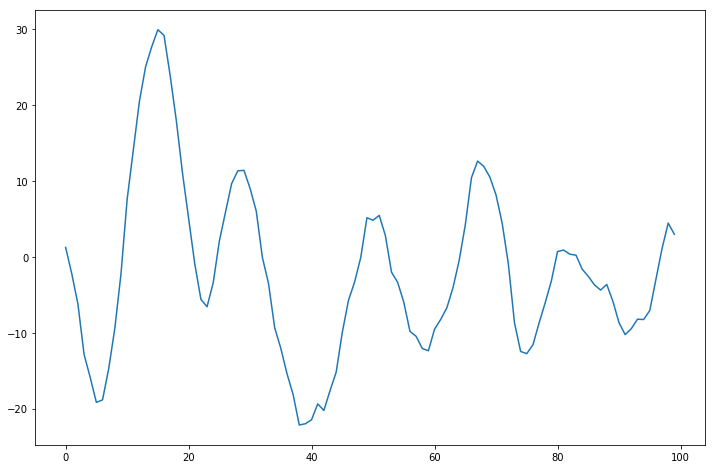

In [10]:
plt.plot(x)
plt.show()

In [11]:
d = 10
al = -d
ar = d
a = np.ones((1, ar - al + 1))

In [12]:
a = a / np.sum(a)

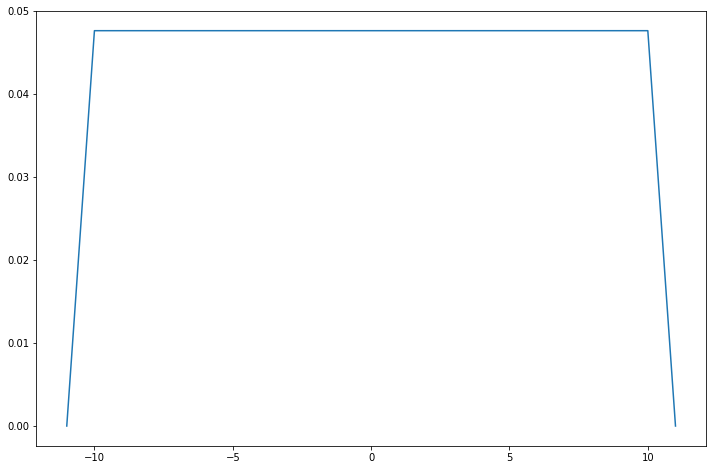

In [13]:
plt.plot([i for i in range(al - 1, ar + 2)], np.append(np.insert(a, 0, 0), 0))
plt.show()

In [14]:
N = M + ar - al
A = np.zeros((N, M))

In [15]:
for j in range(0, M):
    A[j + np.array([k for k in range(0, ar - al + 1)]), j] = a

In [16]:
y = np.matmul(A, x) + s * np.random.normal(size = N)

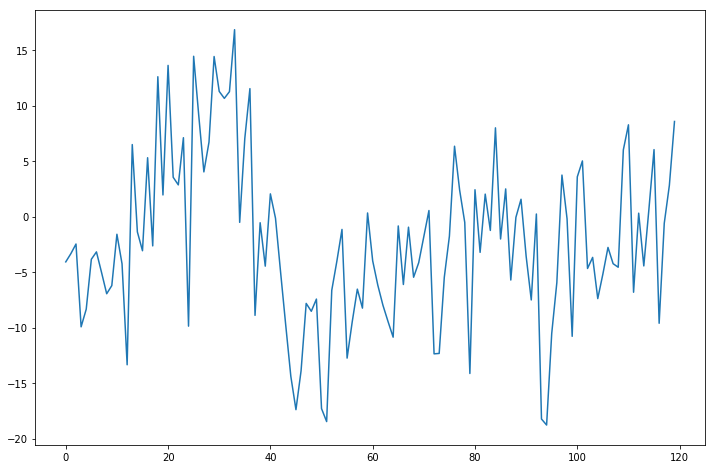

In [17]:
plt.plot(y)
plt.show()

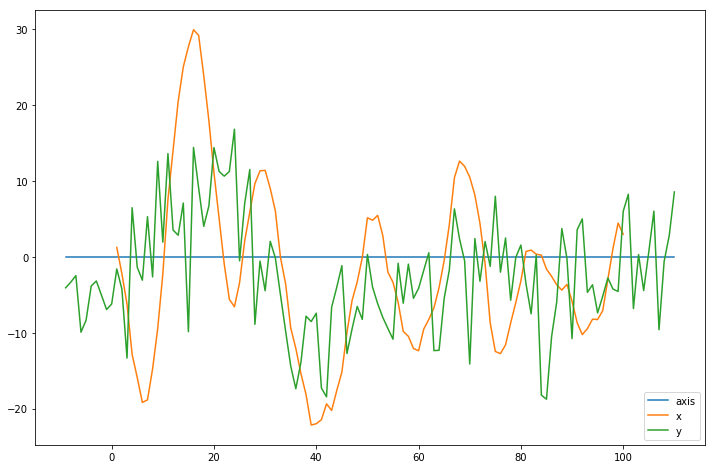

In [18]:
plt.plot([1 + al, M + ar],[0, 0], label='axis')
plt.plot([i for i in range(1, M + 1)], x, label='x')
plt.plot([i for i in range(1 + al, M + ar + 1)], y, label='y')
plt.legend(loc="lower right")
plt.show()

In [19]:
def callibration_1(k, sigma):
    g_0 = np.random.normal(size = M)
    phi_0 = np.matmul(B, g_0)
    psi_0 = np.matmul(A, phi_0) + s*np.random.normal(size = N)
    G=np.outer(psi_0,phi_0)
    H=np.outer(phi_0,phi_0.T)
    for i in range(1,k):
        g_k = np.random.normal(size = M)
        phi_k = np.matmul(B, g_k)
        psi_k = np.matmul(A, phi_k) + s*np.random.normal(size = N)
        G += np.outer(psi_k,phi_k)
        H += np.outer(phi_k,phi_k.T)
    return G, H

In [20]:
# def callibration(k, sigma):
#     phis = []
#     psis = []
#     for i in range(k):
#         g_k = np.random.normal(size = M)
#         phi_k = np.matmul(B, g_k)
#         psi_k = np.matmul(A, phi_k) + s*np.random.normal(size = N)
#         phis.append(phi_k)
#         psis.append(psi_k)
#     return (np.array(phis), np.array(psis))

def callibration(k, sigma):
    g_0 = np.random.normal(size = M)
    phi_0 = np.matmul(B, g_0)
    psi_0 = np.matmul(A, phi_0) + s*np.random.normal(size = N)
    G=np.outer(psi_0,phi_0)
    H=np.outer(phi_0,phi_0.T)
    for i in range(1,k):
        g_k = np.random.normal(size = M)
        phi_k = np.matmul(B, g_k)
        psi_k = np.matmul(A, phi_k) + s*np.random.normal(size = N)
        G += np.outer(psi_k,phi_k)
        H += np.outer(phi_k,phi_k.T)
    return G, H

def observations(x, n):
    y_s = []
    for i in range(n):
        y_n = np.matmul(A, x) + s*np.random.normal(size = N)
        y_s.append(y_n)
    return np.array(y_s)

In [21]:
k = 110
n = 1

In [22]:
# Phi, Psi = callibration(k, s)
# G = np.matmul(Psi.T, Phi)
# H = np.matmul(Phi.T, Phi)
G, H = callibration(k, s)
A0 = np.matmul(G, np.linalg.inv(H))
# J = np.matmul(np.linalg.inv(H),F).trace()*s**2
alpha = np.matmul(np.linalg.inv(H),F).trace()
S = s**2
# J_plus_S = (alpha+1/n)*S
J_plus_S_inv = 1/((alpha+1/n)*s**2)
Q = np.linalg.inv(np.matmul(A0.T*J_plus_S_inv,A0) + np.linalg.inv(F))
y_s = observations(x, n)

In [23]:
x_est = np.matmul(Q,(np.matmul(A0.T*J_plus_S_inv,np.average(y_s, axis=0))))
x_std = list(map(sqrt, Q.diagonal()))

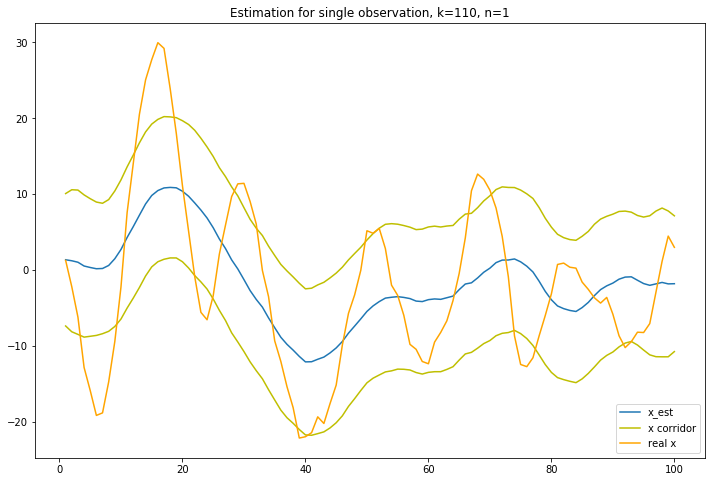

In [24]:
plt.plot([i for i in range(1, M+1)], x_est, label='x_est')
plt.plot([i for i in range(1, M+1)], x_est+x_std, color='y', label='x corridor')
plt.plot([i for i in range(1, M+1)], x_est-x_std, color='y')
plt.plot([i for i in range(1, M+1)], x, color='orange', label='real x')
plt.legend(loc="lower right")
plt.title('Estimation for single observation, k=110, n=1')
plt.show()

In [25]:
k = 400
n = 4

In [26]:
G, H = callibration(k, s)
A0 = np.matmul(G, np.linalg.inv(H))
alpha = np.matmul(np.linalg.inv(H),F).trace()
S = s**2
J_plus_S_inv = 1/((alpha+1/n)*s**2)
Q = np.linalg.inv(np.matmul(A0.T*J_plus_S_inv,A0) + np.linalg.inv(F))
y_s = observations(x, n)
x_est = np.matmul(Q,(np.matmul(A0.T*J_plus_S_inv,np.average(y_s, axis=0))))
x_std = list(map(sqrt, Q.diagonal()))

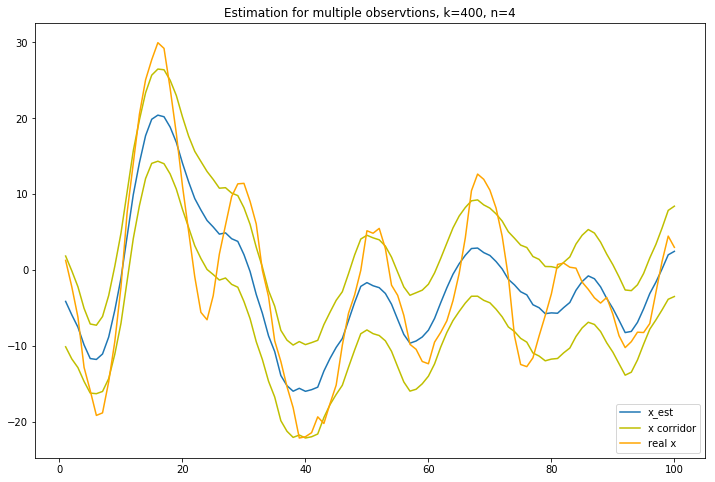

In [27]:
plt.plot([i for i in range(1, M+1)], x_est, label='x_est')
plt.plot([i for i in range(1, M+1)], x_est+x_std, color='y', label='x corridor')
plt.plot([i for i in range(1, M+1)], x_est-x_std, color='y')
plt.plot([i for i in range(1, M+1)], x, color='orange', label='real x')
plt.legend(loc="lower right")
plt.title('Estimation for multiple observtions, k=400, n=4')
plt.show()

In [28]:
k = 1600
n = 16

In [29]:
G, H = callibration(k, s)
A0 = np.matmul(G, np.linalg.inv(H))
alpha = np.matmul(np.linalg.inv(H),F).trace()
S = s**2
J_plus_S_inv = 1/((alpha+1/n)*s**2)
Q = np.linalg.inv(np.matmul(A0.T*J_plus_S_inv,A0) + np.linalg.inv(F))
y_s = observations(x, n)
x_est = np.matmul(Q,(np.matmul(A0.T*J_plus_S_inv,np.average(y_s, axis=0))))
x_std = list(map(sqrt, Q.diagonal()))

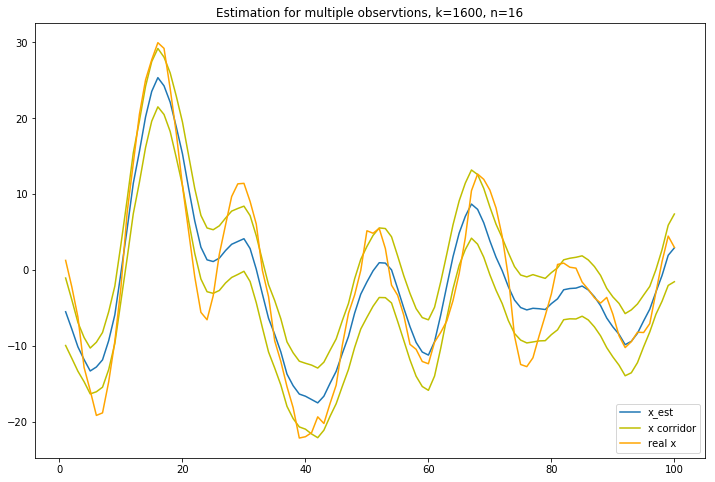

In [30]:
plt.plot([i for i in range(1, M+1)], x_est, label='x_est')
plt.plot([i for i in range(1, M+1)], x_est+x_std, color='y', label='x corridor')
plt.plot([i for i in range(1, M+1)], x_est-x_std, color='y')
plt.plot([i for i in range(1, M+1)], x, color='orange', label='real x')
plt.legend(loc="lower right")
plt.title('Estimation for multiple observtions, k=1600, n=16')
plt.show()